# Group information

Names: Miguel A. Mini Huambachano, Arthur Dionizio Martins da Silva


RAs: 176933, 250814

# **Machine Learning MC886/MO444 - Task \#1**: Regression and Classification


### Objective:

To explore **Linear Regression** and **K-Nearest Neighbors** alternatives and come up with the best possible model for the problems. In this work, we will train three models, one for regression, other for binary classification, and the last one for multiclass classification.

## **Linear Regression**

In this section you must load and explore the dataset, and build a linear regressor by hand. No machine learning libraries are allowed. After building your own regressor, you must compare it with the sklearn `SGDRegressor`.


#### **Dataset: Seoul Bike Sharing Demand**

The dataset contains the count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather and date information.

In order to have a good quality of service, the company needs to understand how to distribute and maintain the bicycles available (or even buy more bikes).<br/>
This dataset was collected with the objective to understand which wheater and holiday information impact the number of bikes rented in this system.


Features and the corresponding descriptions:
- **Date** : Date of the sample (year-month-day)
- **Rented Bike count (TARGET)**: Count of bikes rented at this specific hour
- **Hour**: Hour of the day
- **Temperature**:Temperature (in Celsius)
- **Humidity**: Air humidity level (in %)
- **Windspeed**: Average windspeed during this hour (in m/s)
- **Visibility**: Average visibility level during this hour (in 10m)
- **Dew point temperature**: Average temperature where steam condeses into water during this hour (in Celsius)
- **Solar radiation**: Average level of radiation emitted by the sun during this hour (in MJ/m²)
- **Rainfall**: Average rainfall during this hour (in mm)
- **Snowfall**: Average snowfall during this hour (in cm)
- **Seasons**: Season of this date, it can be: Winter, Spring, Summer or Autumn
- **Holiday**: Describes if this date is a Holiday or not (Holiday/No holiday)
- **Functional Day**: Wheter this was a functional day or not (0 = Non Functional Hours, 1 = Functional hours)


**How to load the dataset**

Dataset folder link: [here](https://drive.google.com/drive/folders/14uiy_7xMq5LOqODBzbIJLD4Vq0E9XD5v?usp=sharing)

You should open the google drive folder, click on the name of the folder on the top and click on "organize" => "add shortcut".<br/>
Then you should choose where to add the shortcut. The recommendation is to add on "MyDrive", so you don't need to change the dataset path used below.

Then you should run the cell below and authorize google drive access.

*If you want to run the notebook locally, just download the folder and change the path below to the location of the folder in your local environment.*

In [1]:
# link with google drive
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/gdrive', force_remount=True)

# load dataset from google drive
path = "gdrive/MyDrive/MC886 - Datasets/" + "SeoulBikeData.csv" # Change this to be the correct path if you added the dataset in a different location
df = pd.read_csv(path)

Mounted at /content/gdrive


### **Data analysis and preprocessing** (1.5 point)

In this section, you should explore the dataset. Remember to avoid using data that you should not have in training.

You can plot graphs with features that you think are important to visualize the relation with the target(`Rented Bike count`). You can also use boxplot graphs to understand feature distributions. There are no minimal/maximum requirements in what graphs you should use, explore just what you think it can help in understanding the dataset.

Check for the dependencies of the features and the target to understand which has bigger impact in it (more details on the `mutual_information` section below!).

The dataset has categorical features that cannot be used in the models. Fix this (Pandas has a built-in function for that!).

Remember that machine learning models are highly affected by the scale of the input features.


**We´ll start our preprocessing by defining which columns will be treated as features (independent variables) and which column will be treated as the target (dependent variable). Notice that, for our features Dataframe, we´re going to have 2 subdivisions of our features: the continuum(numerical) and the discrete(categorical or time-related variables).**

In [2]:
#define X and y

continuum = ['Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)',
             'Visibility (10m)', 'Dew point temperature(C)',
             'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
discrete = ['Date', 'Hour', 'Seasons', 'Holiday', 'Functioning Day']
target = 'Rented Bike Count'

X = df[continuum + discrete].copy()
y = df[target].copy()

X.head()

,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Date,Hour,Seasons,Holiday,Functioning Day
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,01/12/2017,0,Winter,No Holiday,1
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,01/12/2017,1,Winter,No Holiday,1
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,01/12/2017,2,Winter,No Holiday,1
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,01/12/2017,3,Winter,No Holiday,1
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,01/12/2017,4,Winter,No Holiday,1


**Now, we´re going to split our dataset into training and testing sets, designing 75% of the dataset for training and 25% for testing.**

In [3]:
# perc partition
from sklearn.model_selection import train_test_split

perc_test = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=perc_test, random_state=42)
Xy_train = pd.concat([X_train, y_train], axis=1)
Xy_test = pd.concat([X_test, y_test], axis=1)

X_train.head()

,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Date,Hour,Seasons,Holiday,Functioning Day
2223,16.0,14,2.2,1828,-11.5,2.33,0.0,0.0,03/03/2018,15,Spring,No Holiday,1
798,-6.7,48,2.4,1991,-15.9,0.00,0.0,0.0,03/01/2018,6,Winter,No Holiday,1
7752,11.3,71,1.2,1997,6.2,0.00,0.0,0.0,20/10/2018,0,Autumn,No Holiday,1
734,3.0,28,3.8,1956,-13.7,1.10,0.0,0.0,31/12/2017,14,Winter,Holiday,1
2881,11.5,77,2.0,593,7.6,0.00,0.0,0.0,31/03/2018,1,Spring,No Holiday,1


**To visualize the data, we create a scatter matrix plot for our data, which is a helpful way to visualize the relationships between multiple variables at once and identify how each continuous feature relates to the "Rented Bike Count". We firstly concatenate the continuous features from X_train and the target variable y_train into a single DataFrame, so that all these variables can be included in the matrix.**

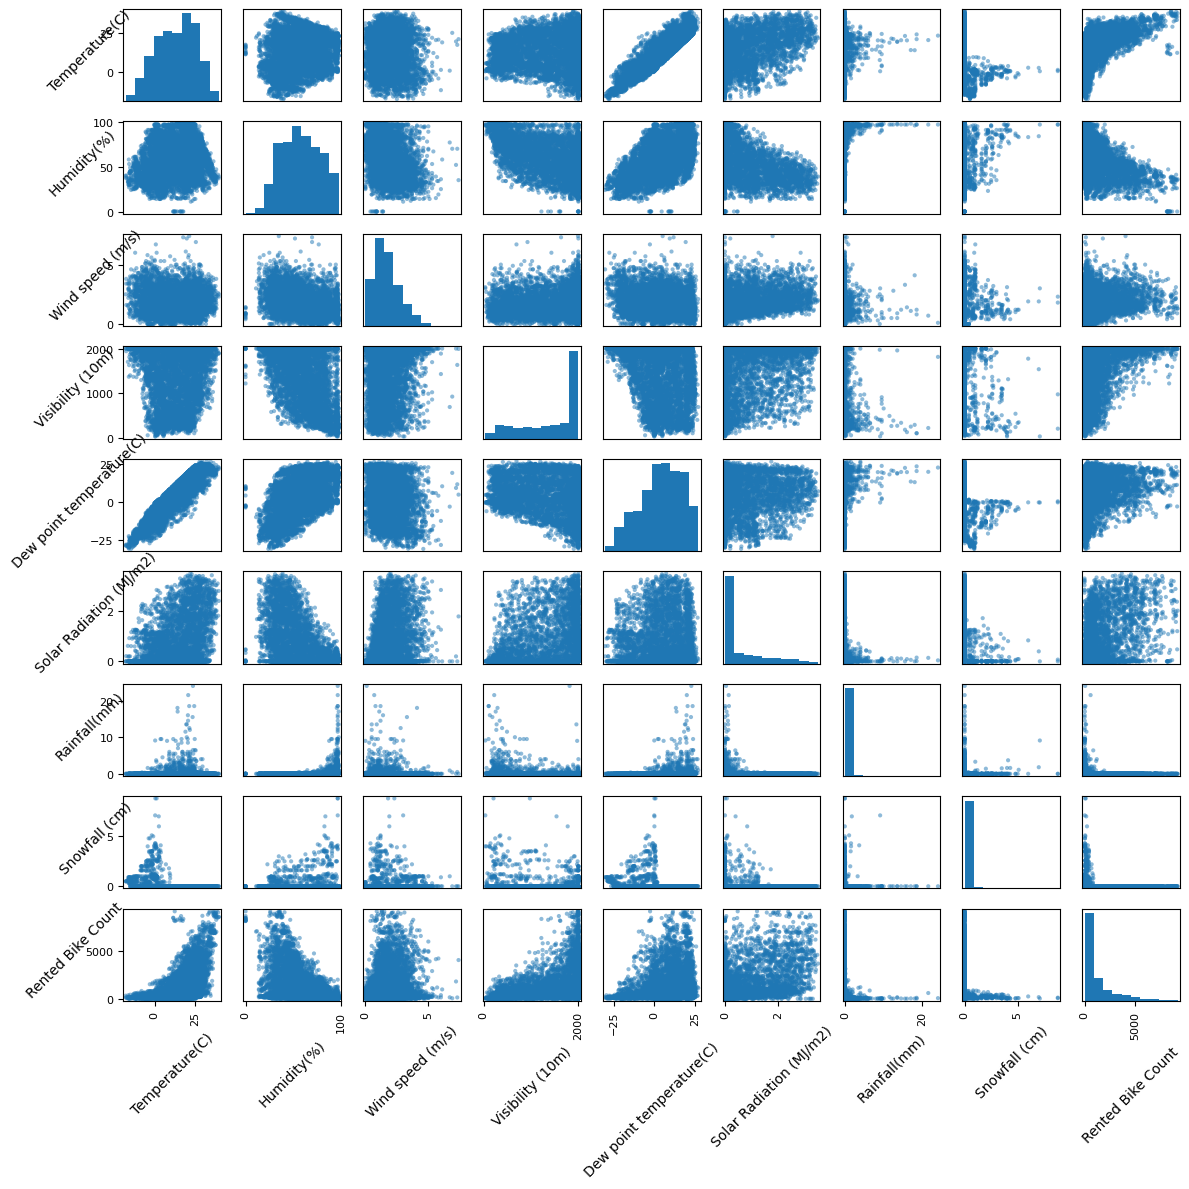

In [4]:
scatter_matrix = pd.plotting.scatter_matrix(pd.concat([X_train[continuum], y_train], axis=1), figsize=(12, 12))

for ax in scatter_matrix.ravel():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(45)

plt.tight_layout()
plt.show()

**And now, we use boxplots for visualizing the distribution of the target variable "Rented Bike Count"(which is a continuous variable) within different categories of the discrete features "Hour", "Seasons", "Holiday" and "Functioning Day". With this, we can see how the distribution of the target variable varies across different levels of these features.**

 **Notice that we still haven´t worked with the "Date" feature because it´s too complex/detailed to be usefully displayed in the current context.**

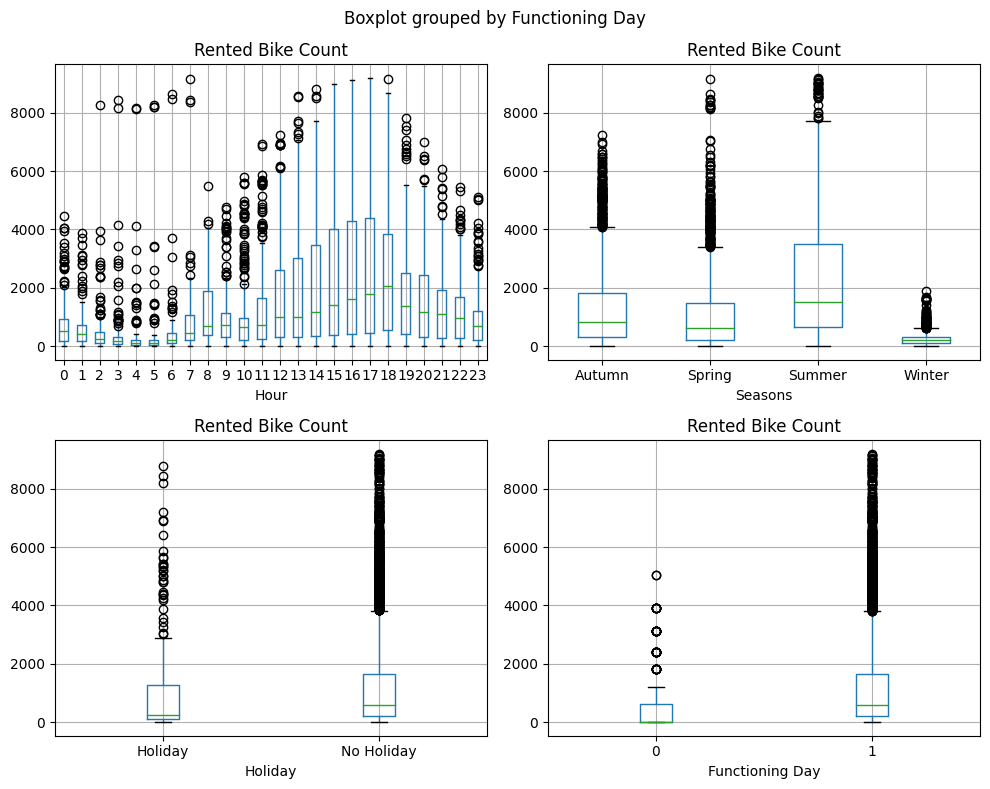

In [5]:
def boxplot_xy(Xy, columns, target, m=2, L=10, R=8):
  fig, axs = plt.subplots(m, len(columns) // m, figsize=(L, R))

  for i, name in enumerate(columns):
    Xy.boxplot(by=name, column=[target], ax=axs[i // m, i % m] if len(columns)>m else axs[i])

  plt.tight_layout()

  plt.show()

boxplot_xy(Xy_train, discrete[1:], target)

**Now, we´re going to define a 'countplot_xy' function to generate countplots for the following categorical features: "Hour", "Seasons", "Holiday" and "Functioning Day".**

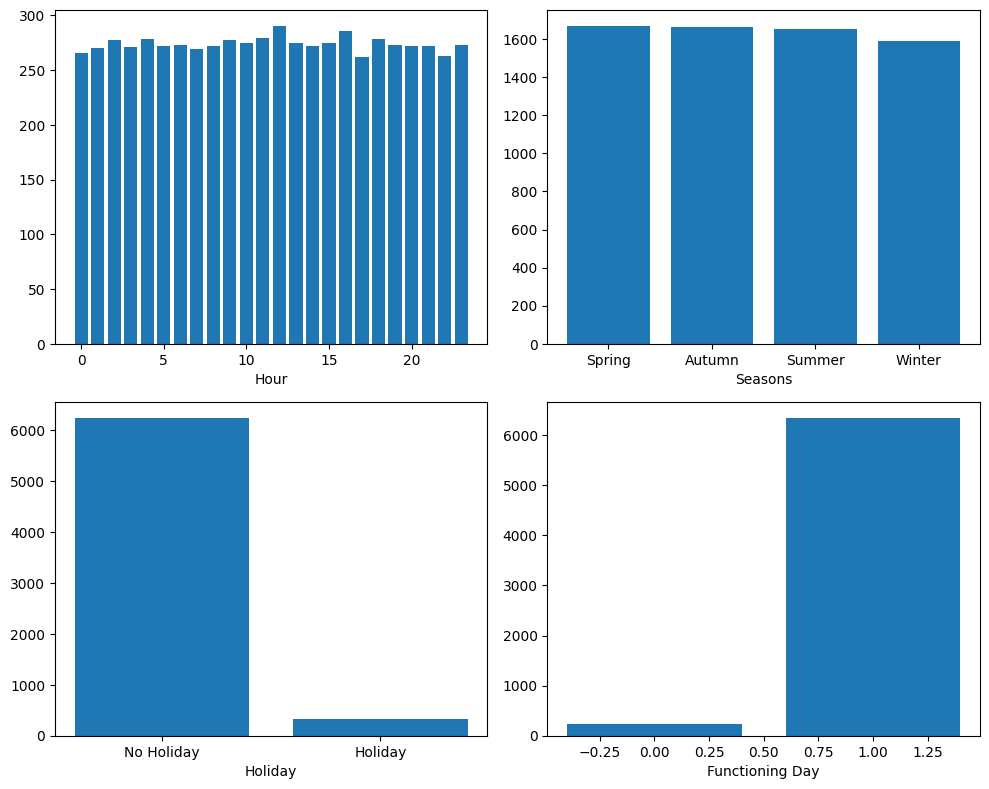

In [6]:
def countplot_xy(Xy, columns, m=2, L=10, R=8):
  fig, axs = plt.subplots(m, len(columns)//m, figsize=(L, R))

  for name, ax in zip(columns, axs.flatten()):
    counts = Xy[name].value_counts()
    ax.bar(counts.index, counts.values)
    ax.set_xlabel(name)

  plt.tight_layout()

countplot_xy(Xy_train, discrete[1:])

**In this part, we´re going to perform some data formatting operations on our dataframe 'X', which are:**


**1.   To drop the column "Dew point temperature(C)" from 'X', once it is strongly correlated with "Temperature(C)". This reduces redundace in the dataset(since keeping both features might not add any significant new information to the model) and avoids potential multicollinearity issues;**

**2.   To convert the "Date" column in 'X' to datetime format, allowing us to perform datetime-related operations and analysis;**

**3.   To extract the day and month components from the "Date" column, storing them in new columns "Day" and "Month" in the dataframe 'X';**

**4.  To drop the "Date" column from 'X'(since the day and month information has already been extracted into separate columns), while throwing away the "Year" feature because it has an uneven distribution of data across different years. In other words, our dataset contains significantly more data for certain years compared to others, and this can lead to issues during model training and evaluation.**

In [7]:
def format(X):

  X.drop(['Dew point temperature(C)'], axis=1, inplace=True)

  X['Date']=pd.to_datetime(X['Date'], format='%d/%m/%Y')

  X['Day'] = X['Date'].dt.day
  X['Month'] = X['Date'].dt.month

  X.drop(['Date'], axis=1, inplace=True)

In [8]:
train_xy = Xy_train.copy()
test_xy = Xy_test.copy()
format(train_xy)
format(test_xy)
new_cols = ['Day', 'Month']
train_xy.head()

,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour,Seasons,Holiday,Functioning Day,Rented Bike Count,Day,Month
2223,16.0,14,2.2,1828,2.33,0.0,0.0,15,Spring,No Holiday,1,4372,3,3
798,-6.7,48,2.4,1991,0.00,0.0,0.0,6,Winter,No Holiday,1,139,3,1
7752,11.3,71,1.2,1997,0.00,0.0,0.0,0,Autumn,No Holiday,1,893,20,10
734,3.0,28,3.8,1956,1.10,0.0,0.0,14,Winter,Holiday,1,264,31,12
2881,11.5,77,2.0,593,0.00,0.0,0.0,1,Spring,No Holiday,1,504,31,3


**Generating countplots and boxplots for the new features 'Day' and 'Month':**

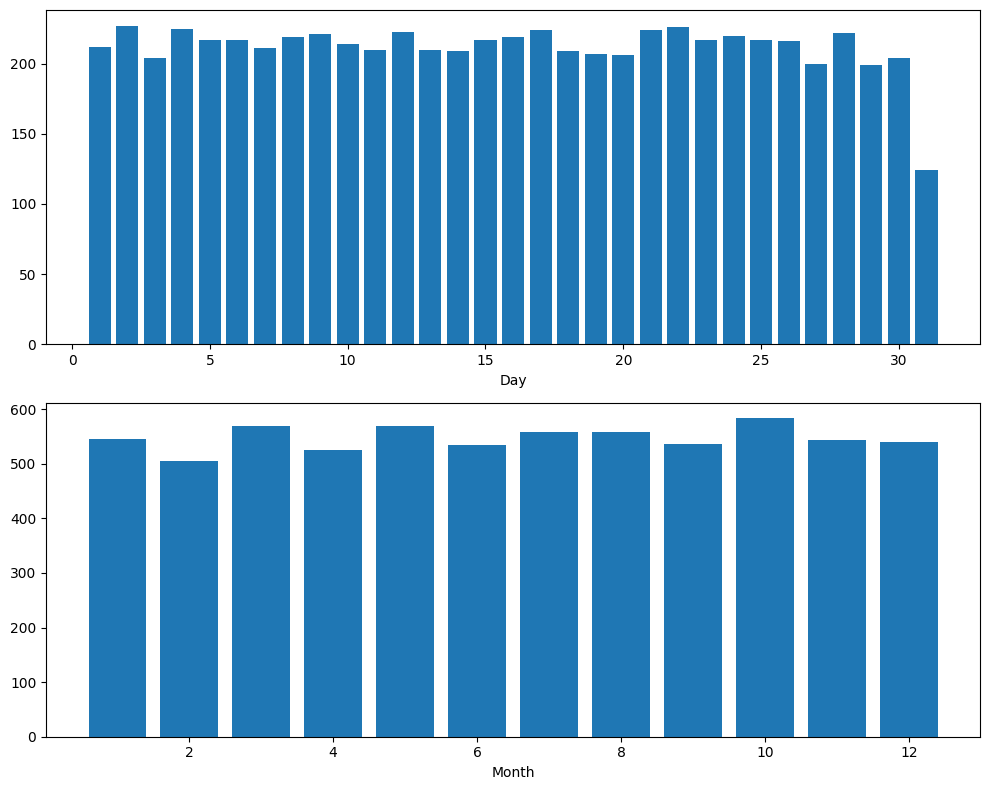

In [9]:
countplot_xy(train_xy, new_cols)

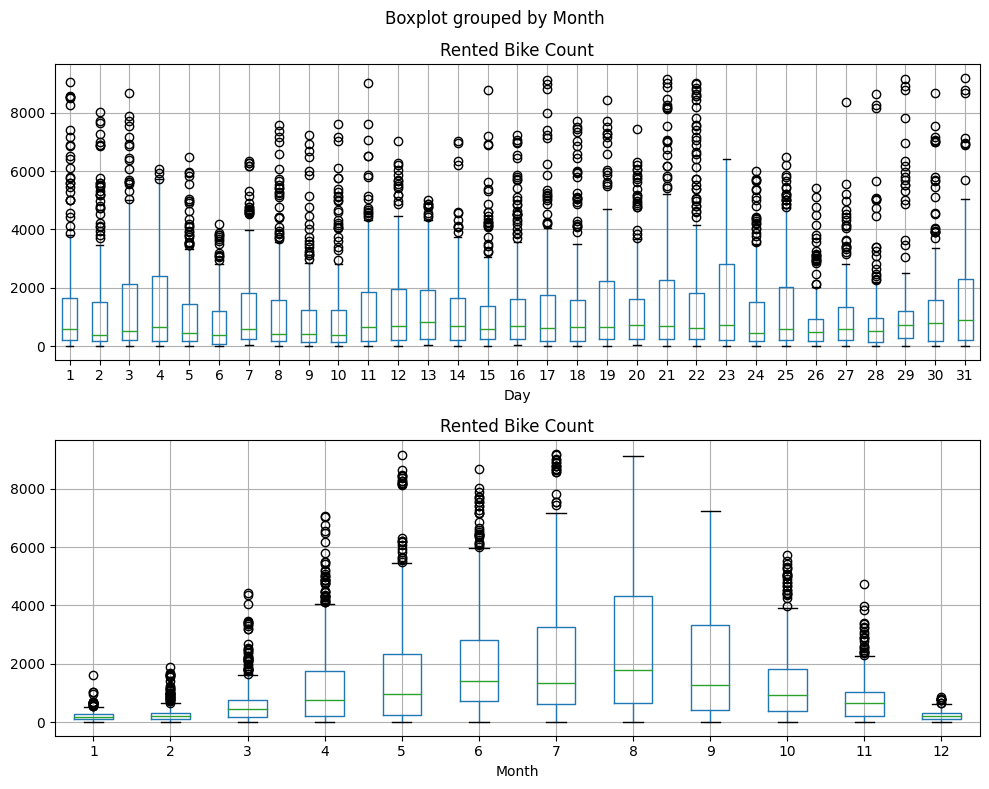

In [10]:
boxplot_xy(train_xy, new_cols, target)

**Mutual information**

The mutual information measure is a way to estimate the mutual dependency of two different variables. Therefore, it might be used as an alternative to t- or F-statistic to assess association between a predictor variable $X_i$ and the response variable $Y$.

In that way, we can try to select features in an early stage of the machine learning pipeline, by removing features with low mutual information with the target.

To do this task, use the `mutual_info_regression` function from the Sklearn library. You should pay attention to the *discrete_features* parameter, that should be correctly constructed (all continuous features should be `False` in the array, while others are True). <br/>
The features that are not numbers also need to be converter in order to `mutual_info_regression` to work. To do this you can use Sklearn's [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder). This way of encoding is not always appropriate for learning experiments, as ordinal encoding represents a specific order between the categorical values. For the mutual information this is not a problem, but you should not use this encoding for the rest of experiments.

Note: *It is important to notice that this preprocess step has to be done carefully, and is not mandatory for all problems/datasets. The mutual information measure does not take into account the interaction between different features. The basic Linear Regressor also does not use this, so this will most likelly enhance (or at least not worsen) the performance of the model. When using more complex models such as Neural Networks (that we will study in the near future), removing the features that have low direct mutual dependency with the target may worsen our model, as the complex model can find those hidden interactions.*


In [11]:
## check Mutal information
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OrdinalEncoder


**Here, we are going to create a Mutual Information function that:**


**1.   Copies the DataFrame: The function starts by making a copy of the input DataFrame df to avoid modifying the original data.**

**2.   Applies Ordinal Encoding: The categorical features 'Seasons' and 'Holiday' are encoded using ordinal encoding. Ordinal encoding converts categorical variables into integer labels.**

**3.  Defines Features and Target: The features ('X') are defined as all columns in the DataFrame except for the target variable 'Rented Bike Count', and the target variable (y) is defined as 'Rented Bike Count'.**

**4.  Identifies Discrete Features: A list discrete is created containing the names of discrete features.**

**5.  Checks for Boolean Features: A loop iterates over each column in 'X', and for each column, it checks if the column name is present in the discrete list. The result (True or False) is appended to the is_bool list.**

**6.  Calculates Mutual Information: Mutual information is calculated between each feature and the target variable (y) using the mutual_info_regression function from Scikit-learn. The discrete_features parameter is set to is_bool to indicate which features are discrete.**

**7.  Visualizes Mutual Information: The mutual information scores are plotted as a bar plot, with the feature names on the x-axis and the mutual information values on the y-axis.**

**8.  Displays the Plot: Finally, the plot is displayed using plt.show().**

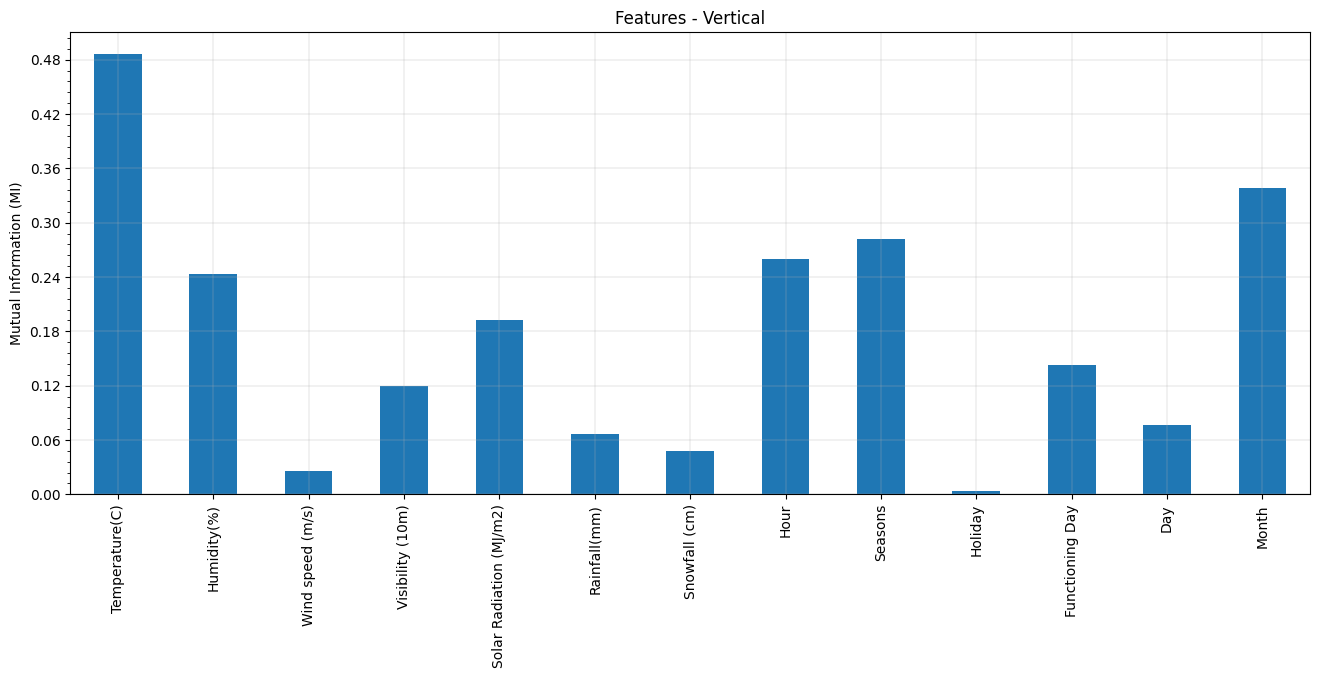

In [12]:
from matplotlib.ticker import AutoMinorLocator

def check_mutual_information(df):
    df_ = df.copy()
    enc = OrdinalEncoder()

    df_['Seasons'] = enc.fit_transform(df_['Seasons'].values.reshape(-1, 1))
    df_['Holiday'] = enc.fit_transform(df_['Holiday'].values.reshape(-1, 1))

    X = df_.drop('Rented Bike Count', axis=1)
    y = df_['Rented Bike Count']
    discrete = ['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Day', 'Month']
    is_bool = []
    for name in X.columns:
      is_bool.append(name in discrete)

    ## Visualize the mutual information of each variable (Just run!)
    ## mt_info is the output of Sklearn function
    mt_info = mutual_info_regression(X, y, discrete_features=is_bool)
    mt_info_df = pd.Series(mt_info)
    mt_info_df.index = X.columns
    mt_info_df.plot.bar(figsize = (16,6));
    plt.ylabel('Mutual Information (MI)')
    plt.title('Features - Vertical')
    plt.grid(linewidth=0.25)
    plt.yticks(fontsize=10)  # Set the font size of the ticks
    plt.gca().yaxis.set_major_locator(plt.MaxNLocator(10))  # Set the number of major ticks
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator(5))
    plt.show()

check_mutual_information(train_xy)

**Here, two main things are done:**

**1.   Adapting the categorical feature "Seasons" in the dataframe 'Xy' using One-Hot Encoding;**

**2.   Removing variables that are considered uninformative based on the mutual information graphs above. These features are:  'Wind speed', 'Snowfall', 'Rainfall', 'Holiday', and 'Day'.**



In [13]:
## Adapt the categorical features
def adapt_categorical(Xy):
  xy = Xy.copy()
  xy = pd.get_dummies(xy, columns=['Seasons'])

  # eliminar variables no influenciantes segun el mutual info
  return xy.drop(['Wind speed (m/s)', 'Snowfall (cm)', 'Rainfall(mm)', 'Holiday', 'Day'], axis=1)

train_xy_ = adapt_categorical(train_xy)
test_xy_ = adapt_categorical(test_xy)
train_xy_.head()

,Temperature(C),Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Hour,Functioning Day,Rented Bike Count,Month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
2223,16.0,14,1828,2.33,15,1,4372,3,False,True,False,False
798,-6.7,48,1991,0.00,6,1,139,1,False,False,False,True
7752,11.3,71,1997,0.00,0,1,893,10,True,False,False,False
734,3.0,28,1956,1.10,14,1,264,12,False,False,False,True
2881,11.5,77,593,0.00,1,1,504,3,False,True,False,False


#### Discussion of key points

- How the visualization helped in understanding the data?

**The visualization of the Mutual Information graph is great for identifying which features are strongly related to our target column, which is, in our case, the "Rented Bike Count". The higher the Mutual Information value of a certain feature, the stronger the relationship between this feature and the number of rented bikes. In other words, features with high Mutual Information suggest that varying conditions of those features significantly impact the "Rented Bike Count".**

**Besides all of that, the Mutual Information graph is vital for checking whether there exists a clear and interpretable relationship between variables and understanding the nature of the relationship between predictors and the target variable is crucial for model interpretation and inference.**

- Looking at the mutual information plot, can you find features that seem to be uninfluential? (If so, remember to remove them before next steps!)

**Analyzing the figure above, we can clearly see that, while some features have a really significant impact on the number of rented bikes, other features have a really low correlation with out target column, resulting in a extremely low Mutual Information value. These features that seem to be uninfluential due to its randomness or its almost static behavior are: "Windspeed", "Day of the week", "Holiday", "Snowfall" and "Rainfall".**

  **Upon reflecting on the graph, the lack of importance of these variables makes total sense, once: the feature "Holiday" didn´t show impactful contribution, especially because the "Rented Bike Count" don't have a significant change from one day to another, and this makes sense because the feature "Day" didn't turn out to be actually relevant; about the features "Snowfall" and "Rainfall", both seemed unnecessary since they had a rather static behavior; and, lastly, "Windfall" showed to be totally irrelevant since it has a MI of less than 0.03.**


### **Implement and train a Linear Regressor** (2.5 points)

You should complete the implementation of the `MyLinearRegressor` class and of the `MSE` metric started below. No machine learning libraries are allowed for this.

The common regression metrics used to understand regression model's perfomance are the Mean Squared Error (MSE), Mean Absolute Error (MAE) and Coefficient of determination(R²). You can implement your own version of the last two metrics (MAE and R²) or use it from sklearn. Compare the three different metrics.

**Implementation of MSE, MAE and R²:**

In [14]:
def MSE(actual, predicted):
    return np.mean((actual - predicted) ** 2)

def MAE(actual, predicted):
    return np.mean(np.abs(actual - predicted))

def R2(actual, predicted):
    actual_mean = np.mean(actual)
    MSE = np.mean((actual - predicted) ** 2)
    actual_variance = np.mean((actual - actual_mean) ** 2)
    return 1 - (MSE / actual_variance)

**Complete implementation of the 'MyLinearRegressor' class:**

In [15]:
class MyLinearRegressor():
    def __init__(self, learning_rate=0.1, max_iter=100, tolerance=1e-5):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.tolerance = tolerance
        self.stamps = []
        self.weights = None
        self.bias = None

    def predict(self, X):
        if self.weights is None or self.bias is None:
            raise Exception("Model has not been trained yet.")
        return np.dot(X, self.weights) + self.bias

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.max_iter):
            y_pred = self.predict(X)
            error = y_pred - y
            weights_gradient = 2 * np.dot(X.T, error) / num_samples
            bias_gradient = 2 * np.sum(error) / num_samples
            self.stamps.append(MSE(y, y_pred))
            self.weights -= self.learning_rate * weights_gradient
            self.bias -= self.learning_rate * bias_gradient

            if np.all(np.abs(weights_gradient) < self.tolerance) and np.abs(bias_gradient) < self.tolerance:
                break

**The function defined below takes training and testing data, trains a linear regression model using 'MyLinearRegressor', evaluates its performance on the testing data and plots the Mean Squared Error over iterations.**

In [16]:
print(X_train.shape)
print(X_test.shape)

(6570, 13)
(2190, 13)


MSE final: 998675.4121108965
MAE final: 756.5772554850612
R2 score final: 0.6141027375722132


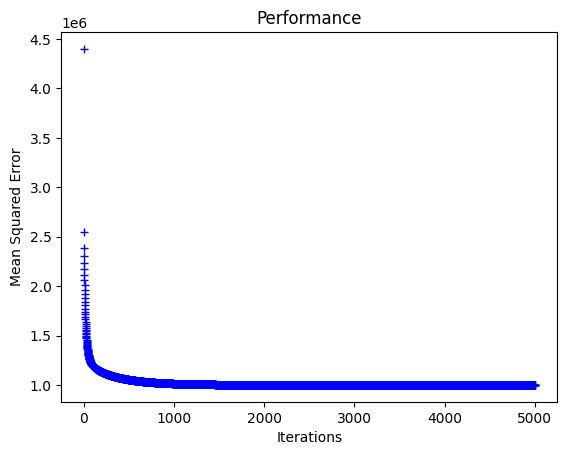

In [17]:
def evaluate(X_train, y_train, X_test, y_test):
  X_train = X_train.astype(float)
  X_test = X_test.astype(float)
  train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
  test = (X_test - X_train.min()) / (X_train.max() - X_train.min())

  model = MyLinearRegressor(learning_rate=0.1, max_iter=5000, tolerance=1e-6)
  model.fit(train, y_train)

  print("MSE final:", MSE(y_test, model.predict(test)))
  print("MAE final:", MAE(y_test, model.predict(test)))
  print("R2 score final:", R2(y_test, model.predict(test)))

  plt.plot(range(len(model.stamps)), model.stamps, "b+")
  plt.title('Performance')
  plt.xlabel('Iterations')
  plt.ylabel('Mean Squared Error')
  plt.show()

X_tr = train_xy_.drop(target, axis=1).copy()
y_tr = train_xy_[target].copy()
X_te = test_xy_.drop(target, axis=1).copy()
y_te = test_xy_[target].copy()

evaluate(X_tr, y_tr, X_te, y_te)


**The following block code creates a boxplot of the target variable, which we called previously 'y_tr', while it highlights important values such as minimum, 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), and maximum.**

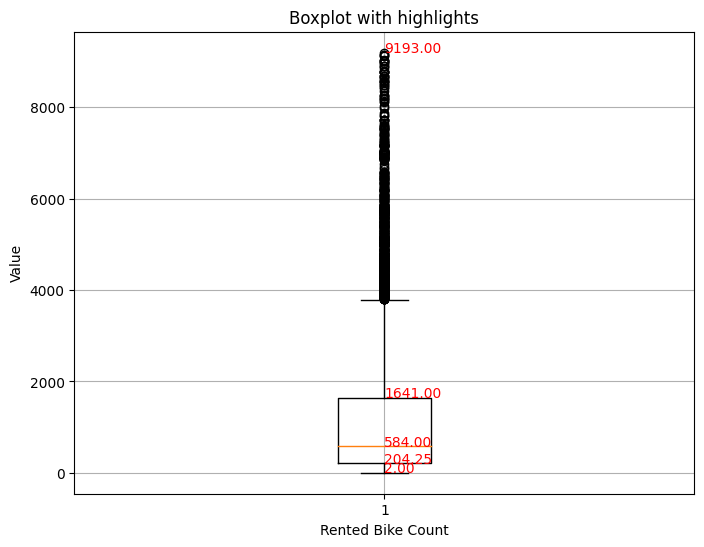

In [18]:
plt.figure(figsize=(8,6))
plt.boxplot(y_tr)

# Resalta los valores importantes
important_values = [np.min(y_tr), np.percentile(y_tr, 25), np.median(y_tr), np.percentile(y_tr, 75), np.max(y_tr)]
for i, value in enumerate(important_values):
    plt.text(1, value, f'{value:.2f}', fontsize=10, color='red')

plt.title('Boxplot with highlights')
plt.xlabel('Rented Bike Count')
plt.ylabel('Value')
plt.grid(True)
plt.show()

#### Discussion of key points

- Looking at the different metrics proposed, what is the best one for this problem?

**Among the metrics proposed for evaluating our Linear Regression model (MSE, MAE, R²), the choice of the most suitable one depends on the specific characteristics of our problem and the objectives of our analysis. In our case, the Mean Squared Error (MSE) appears to be the most fitting metric. This is because MSE provides a comprehensive assessment of predictive accuracy while also accounting for the presence of outliers in our data. Considering that the majority of our data points fall within a certain range of values(between 204 and 1641), MSE's ability to penalize larger errors allows us to effectively evaluate the performance of our model within this range.**

**For the Mean Absolute Error (MAE), it offers a more balanced view of error by considering all deviations equally. However, in our case, the large magnitude of MAE in comparison to the median suggests a potential bias in our predictions, making it less preferable for our analysis.**

**Additionally, the Coefficient of Determination (R²) provides valuable insight into the proportion of variance explained by our model. A high R² value, such as the one we've obtained (approximately 61%), indicates that a significant portion of the variance in the target variable is captured by our model. While R² complements our understanding of model performance by quantifying the degree of explanation(how well our features explain the variability in our target), it alone may not provide a complete picture.**

**In conclusion, while MSE serves as a robust metric for assessing predictive accuracy and handling outliers, the inclusion of R² as a complementary measure allows us to gain further insights into the explanatory power of our model. Thus, a combination of MSE and R² provides a more comprehensive evaluation of our Linear Regression problem.**

- Your Linear Regressor was able to closely estimate the amount of bikes rented per hour? Justify using a machine learning metric.

**While the MSE measures the discrepancy between predicted and actual values, it may not capture the full complexity of our Linear Regression model's performance in estimating the distribution of rented bikes across different intervals of time. While MSE effectively penalizes large errors, it's important to consider the context of our problem.**

**In our case, where the number of rented bikes varies widely, ranging from a minimum of 2 to a median value of approximately 580, the sheer magnitude of the MSE suggests that our model's predictions exhibit substantial errors. Despite its ability to handle outliers, MSE alone may not adequately capture the nuances of our dataset, particularly in accurately estimating smaller values.**

**Thus, it should be complemented by some additional metrics and qualitative analysis to provide a more comprehensive assessment. And, as discussed earlier, adding the R² metric might be a great idea.**

- What do you think is the biggest error type in your model: variance or bias?

**Considering the discussed observations, it's apparent that the model struggles to accurately capture outliers, leading to errors in estimating the variance of the data. Despite this limitation, the model demonstrates an ability to capture the general trend of the data, suggesting that it possesses some degree of predictive capability, particularly in relation to the central tendency of the dataset. This indicates that while the model may not excel in capturing extreme values, it still provides valuable insights into the underlying patterns and trends within the dataset.**


### **Compare with SGDRegressor** (0.5 point)

After training your regressor, train a `SGDRegressor` from sklearn and compare both.

In [19]:
from sklearn.linear_model import SGDRegressor

In [20]:
def evaluateSGD(X_train, y_train, X_test, y_test):
  X_train = X_train.astype(float)
  X_test = X_test.astype(float)
  train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
  test = (X_test - X_train.min()) / (X_train.max() - X_train.min())

  model = SGDRegressor(max_iter=5000, tol=1e-5, random_state=42, eta0=1e-2)
  model.fit(train, y_train)

  print("MSE final:", MSE(y_test, model.predict(test)))
  print("MAE final:", MAE(y_test, model.predict(test)))
  print("R2 score final:", R2(y_test, model.predict(test)))

evaluateSGD(X_tr, y_tr, X_te, y_te)

MSE final: 995923.3738546064
MAE final: 747.1567128566069
R2 score final: 0.61516615018488


**Our regressor got the following values:**

*   MSE final: 998675.4121108965
*   MAE final: 756.5772554850612
*   R2 score final: 0.6141027375722132

**The `SGDRegressor` got:**

*   MSE final: 995923.3738546064

*   MAE final: 747.1567128566069

*   R² score final: 0.61516615018488



**1.  About the MSE:**

  **Both values are relatively close, with the `SGDRegressor` achieving a slightly lower MSE. This indicates that both models have a similar overall level of error in their predictions.**

**2.  About the MAE:**

  **Again, both values are close, with the `SGDRegressor` showing a slightly lower error. This suggests that both models have a similar average absolute deviation from the actual values.**

**3.  About the R² score:**

  **The R² score values are very close, indicating that both models explain approximately the same proportion of variance in the target variable. This suggests that both models have similar explanatory power.**

**From all the analyses made above, we can conclude that, in general, the performances of our regressor and the `SGDRegressor` are quite similar through all of the 3 metrics, with the `SGDRegressor` achieving slightly better results. Therefore, we can conclude that both models are quite effective for predicting the amount of rented bikes in any time interval.**

### **EXTRA: Find interaction terms** (0.5 point)

In the "An Introduction to Statistical Learning" book, in chapter 3, the authors explain how different terms can interact with each other, and this interaction can have a bigger correlation with the target.

In this extra task, search for relation of columns that can enhance the results of the model.<br/>
The interaction could be to sum, subtract, multiply or divide two columns by each other. Choose some relations to test between some of the columns. <br/>
To do this, you can use the `mutual_information` technique to test wheter the new columns have bigger Mutual Information.

You should train your own model **not** the Sklearn one.



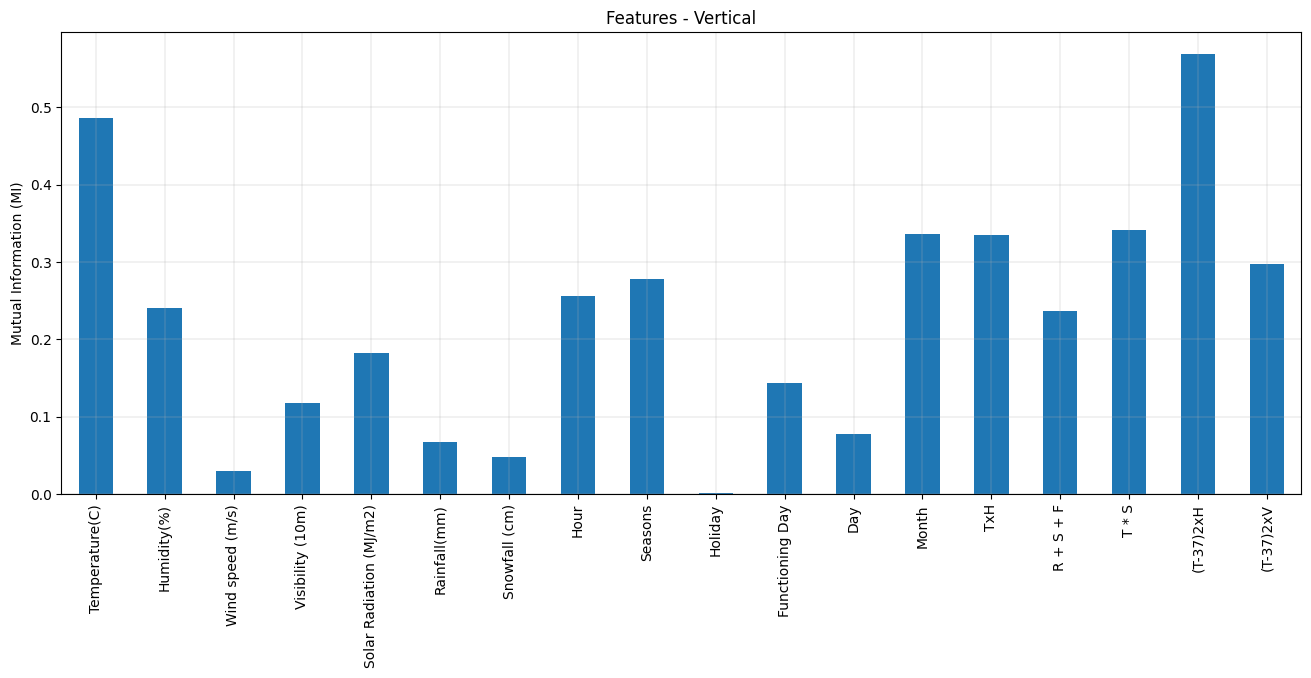

In [21]:
# Reload the dataset
# Transform features
# Check mutual information
def check_mutual_information2(df):
    df_ = df.copy()
    enc = OrdinalEncoder()

    df_['Seasons'] = enc.fit_transform(df_['Seasons'].values.reshape(-1, 1))
    df_['Holiday'] = enc.fit_transform(df_['Holiday'].values.reshape(-1, 1))

    X = df_.drop('Rented Bike Count', axis=1)
    y = df_['Rented Bike Count']

    X['TxH'] = X['Temperature(C)'] * X['Humidity(%)']
    X['R + S + F'] = X['Functioning Day'] + X['Rainfall(mm)'] + X['Snowfall (cm)']
    X['T * S'] = X['Temperature(C)'] * X['Solar Radiation (MJ/m2)']
    X['(T-37)2xH'] = (X['Temperature(C)']-37)**2 * X['Humidity(%)']
    X['(T-37)2xV'] = (X['Temperature(C)']-37)**2 * X['Visibility (10m)']
    discrete = ['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Day', 'Month']
    is_bool = []
    for name in X.columns:
      is_bool.append(name in discrete)

    ## Visualize the mutual information of each variable (Just run!)
    ## mt_info is the output of Sklearn function
    mt_info = mutual_info_regression(X, y, discrete_features=is_bool)
    mt_info_df = pd.Series(mt_info)
    mt_info_df.index = X.columns
    mt_info_df.plot.bar(figsize = (16,6));
    plt.ylabel('Mutual Information (MI)')
    plt.title('Features - Vertical')
    plt.grid(linewidth=0.25)
    plt.show()

check_mutual_information2(train_xy)

**Here, we define a function which objective is to adapt the categorical features and create new ones in our dataframe.**

**Also, we remove several columns that can be considered unimportant based on the Mutual Information analysis performed earlier, with all of them having a MI value of less than 0.2. This includes:**
* "Wind speed (m/s)"
* "Solar Radiation (MJ/m2)"
* "Snowfall (cm)"
* "Rainfall(mm)"
* "Holiday"
* "Day"
* "Functioning Day"

In [22]:
def adapt_categorical2(Xy):
  xy = Xy.copy()
  xy = pd.get_dummies(xy, columns=['Seasons'])

  xy['TxH'] = xy['Temperature(C)'] * xy['Humidity(%)']
  #xy['R + S + F'] = xy['Functioning Day'] + xy['Rainfall(mm)'] + xy['Snowfall (cm)']
  xy['(T-37)2xH'] = (xy['Temperature(C)']-37)**2 * xy['Humidity(%)']

  return xy.drop(['Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Snowfall (cm)', 'Rainfall(mm)', 'Holiday', 'Day', 'Functioning Day'], axis=1)

train_xy_2 = adapt_categorical2(train_xy)
test_xy_2 = adapt_categorical2(test_xy)
train_xy_2.head()


,Temperature(C),Humidity(%),Visibility (10m),Hour,Rented Bike Count,Month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,TxH,(T-37)2xH
2223,16.0,14,1828,15,4372,3,False,True,False,False,224.0,6174.00
798,-6.7,48,1991,6,139,1,False,False,False,True,-321.6,91665.12
7752,11.3,71,1997,0,893,10,True,False,False,False,802.3,46894.79
734,3.0,28,1956,14,264,12,False,False,False,True,84.0,32368.00
2881,11.5,77,593,1,504,3,False,True,False,False,885.5,50069.25


**Now, re-training the set and testing the model, we get:**

MSE final: 632581.9241119587
MAE final: 574.0018134128511
R2 score final: 0.7555645910415187


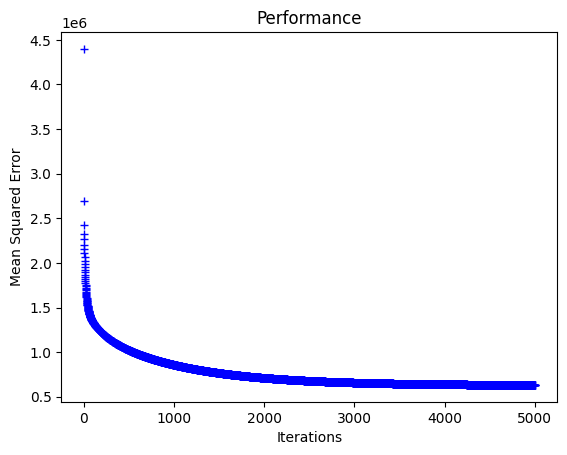

In [23]:
X_tr = train_xy_2.drop(target, axis=1).copy()
y_tr = train_xy_2[target].copy()
X_te = test_xy_2.drop(target, axis=1).copy()
y_te = test_xy_2[target].copy()

evaluate(X_tr, y_tr, X_te, y_te)

**It´s clear that we´ve gotten way better results with the new model and it outperforms both the first and the `SGDRegressor` in terms of all 3 metrics MSE, MAE and R², once it achieves lower errors and explains better the variance in the target variable "Rented Bike Count".**

## **K-Nearest Neighbors (KNN) Classifier**

In this section you must load and explore the dataset, and train a K-Nearest Neighbors (KNN) classifier. You can (and should) use the Sklearn library to it.

Remember to avoid using data that you should not have in training when performing the data analysis.

#### **Dataset: In-vehicle coupon recommendation**

This dataset was built using Amazon Mechanical Turk, which is a tool to apply surveys to a specific range of users.

The applied survey was made by asking user for demographic informations, and then presenting 20 driving scenarios and possible coupon offers.
<br/>
The users had to answer if they would want the coupon or not.

The focus of this dataset was to understand how to correct apply advertsiment of in-vehicle coupons.

Features and the corresponding descriptions:
- **destination**: Destination of the driving scenario. Options: No Urgent Place, Home, Work
- **passanger**: People in the car of the driving scenario. Options: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
- **weather**: Weather of the driving scenario. Options: Sunny, Rainy, Snowy
- **temperature**: Temperature of the driving scenario. Options: 55, 80, 30
- **time**: Hour of the driving scenario. Options: 2PM, 10AM, 6PM, 7AM, 10PM
- **coupon**: Type of coupon offered. Options:
  - Restaurant(< \\$20), Coffee House, Carry out & Take away, Bar, Restaurant(\\$20-\\$50)
- **expiration**: Expiration of the coupon in the scenario. Options: 1d, 2h (the coupon expires in 1 day or in 2 hours)
- **gender**: Gender of the person answering the survey. Options: Female, Male
- **age**: Age of the person answering the survey. Options: 21, 46, 26, 31, 41, 50plus, 36, below21
- **maritalStatus**: Marital status of the person answering the survey. Options: Unmarried partner, Single, Married partner, Divorced, Widowed
- **has_Children**: If the person answering the survey has children. Options:1, 0
- **education**: Edducation level of the person answering the survey. Options: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
- **ocupation**: Ocupation of the person answering the survey. Options:
  - Unemployed, Architecture & Engineering, Student, Education&Training&Library, Healthcare Support, Healthcare Practitioners & Technical, Sales & Related, Management, Arts Design Entertainment Sports & Media, Computer & Mathematical, Life Physical Social Science, Personal Care & Service, Community & Social Services, Office & Administrative Support, Construction & Extraction, Legal, Retired, Installation Maintenance & Repair, Transportation & Material Moving, Business & Financial, Protective Service, Food Preparation & Serving Related, Production Occupations, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
- **income**: Anual income of the person answering the survey. Options:
  - \\$37500 - \\$49999, \\$62500 - \\$74999, \\$12500 - \\$24999, \\$75000 - \\$87499, \\$50000 - \\$62499, \\$25000 - \\$37499, \\$100000 or More, \\$87500 - \\$99999, Less than \\$12500
- **Bar**: Question: how many times do you go to a bar every month? Options: never, less1, 1\~3, 4\~8, gt8, nan
- **CoffeeHouse**: Question: how many times do you go to a coffeehouse every month? never, less1, 4\~8, 1\~3, gt8,  nan
- **CarryAway**: Question: how many times do you get take-away food every month? Options: n4\~8, 1\~3, gt8, less1, never
- **RestaurantLessThan20**: Question: how many times do you go to a restaurant with an average expense per person of less than $20 every month? Options: 4\~8, 1\~3, less1, gt8,  never
- **Restaurant20To50**: Question: how many times do you go to a restaurant with average expense per person of \\$20 - \\$50 every month? Options: 1\~3, less1, never, gt8, 4\~8,  nan
- **toCoupon_GEQ15min**: Indicator if the driving distance to the restaurant/bar for using the coupon is greater than 15 minutes in the driving scenario. Options: 0,1
- **toCoupon_GEQ25min**: Indicator if the driving distance to the restaurant/bar for using the coupon is greater than 25 minutes in the driving scenario. Options: 0,1
- **direction_same**:  Indicator whether the restaurant/bar is in the same direction as your current destination in the driving scenario. Options: 0,1
- **direction_opp**: Indicator whether the restaurant/bar is in the opposite direction as your current destination. Options: 1, 0
- **Y**: Wheter the coupon was accepted. Options: 1, 0

**How to load the dataset**

As you already copied the folder in the first part of this task, you can just directly load the dataset.

*If you want to run the notebook locally, change the path below to the location of the folder in your local environment.*

In [24]:
# link with google drive, remove comments if need to restart from this step.
import pandas as pd
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

# load dataset from google drive
path = "gdrive/MyDrive/MC886 - Datasets/" + "in-vehicle-coupon-recommendation.csv" # Change this to be the correct path if you added the dataset in a different location

df = pd.read_csv(path)

### **Data analysis and preprocessing** (1.5 point)

In this section, you should explore the dataset.
This should be done as in the Linear Regressor section, paying attention to mutual information (now using [`mutual_info_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html)) and categorical features.

Check for missing values before changing the dataset and explore how to deal with them (removing? filling with mean/median/random? Etc).

Remember that machine learning models are highly affected by the scale of the input features.


**We'll start by defining a feature matrix 'X', which is composed of all the columns of our dataframe 'df' except the target variable 'Y'. We also define a target vector 'y', made exclusively of 'Y'.**

**Then, after defining the variable 'cols' as the column names of the feature matrix 'X', we create countplots of 'cols', subdivided into intervals of 5 columns.**

In [25]:
X = df.drop('Y', axis=1).copy()
y = df['Y'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=perc_test, random_state=42)
cols = X.columns

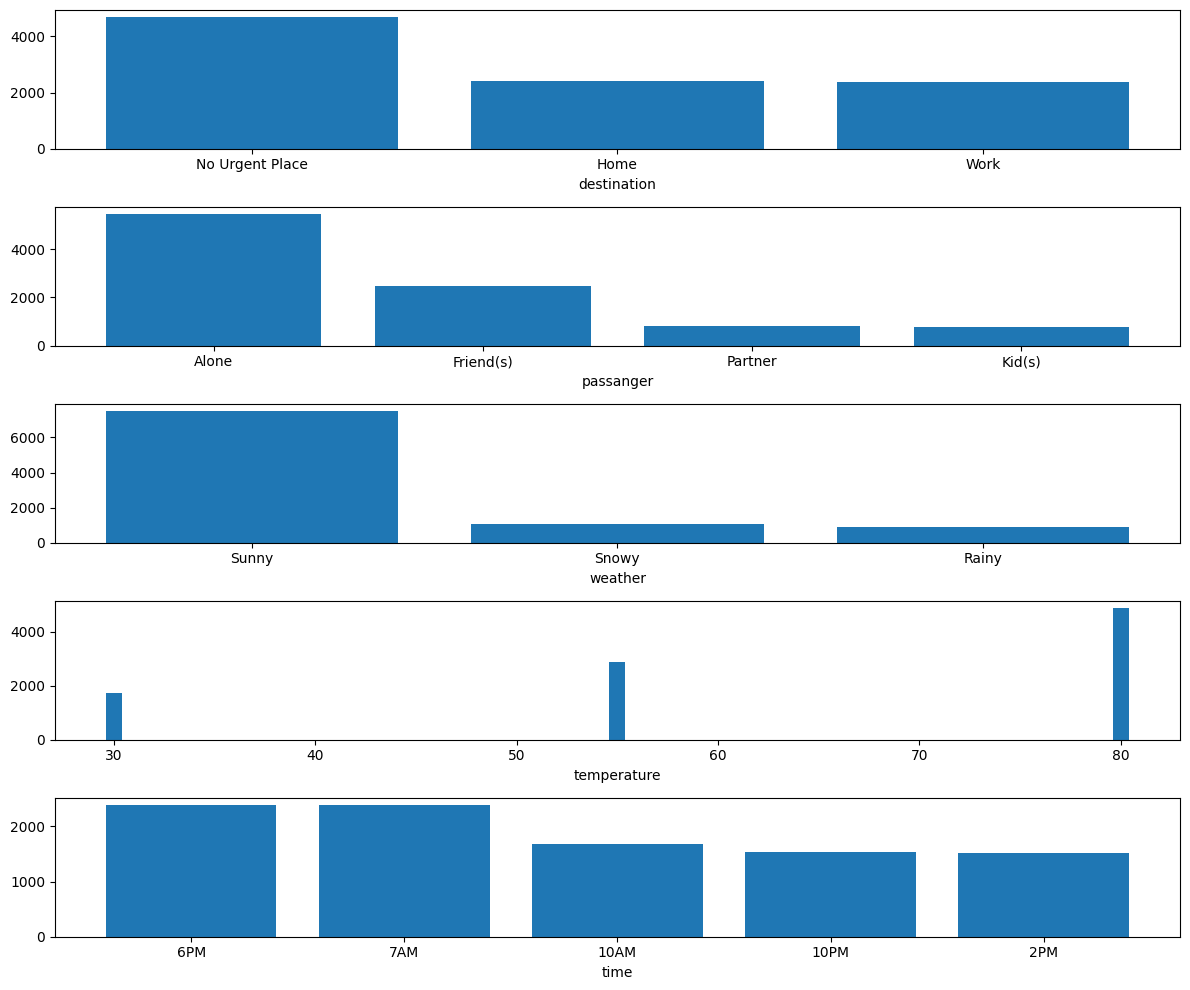

In [26]:
countplot_xy(X_train, cols[:5], m=5, L=12, R=10)

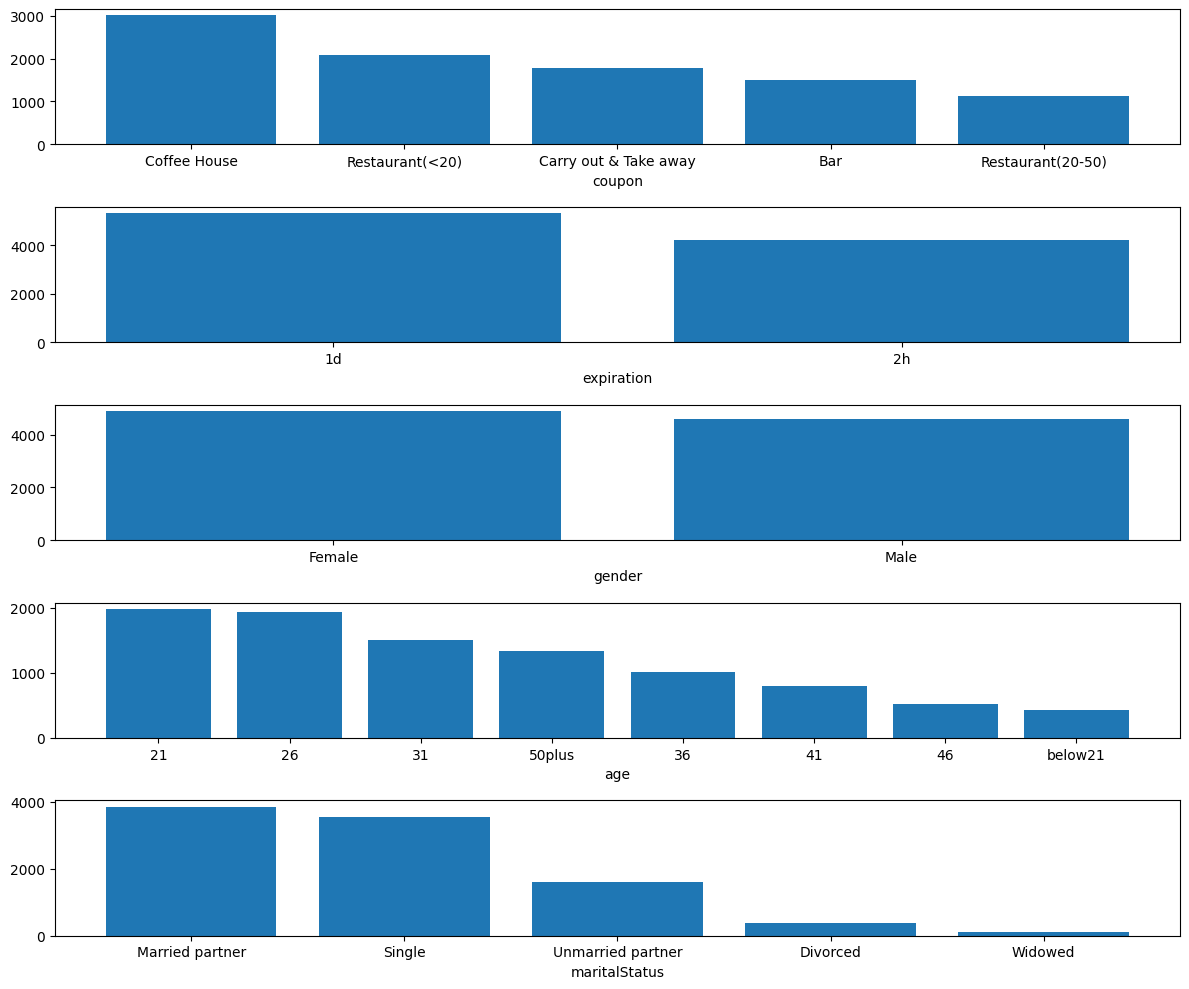

In [27]:
countplot_xy(X_train, cols[5:10], m=5, L=12, R=10)

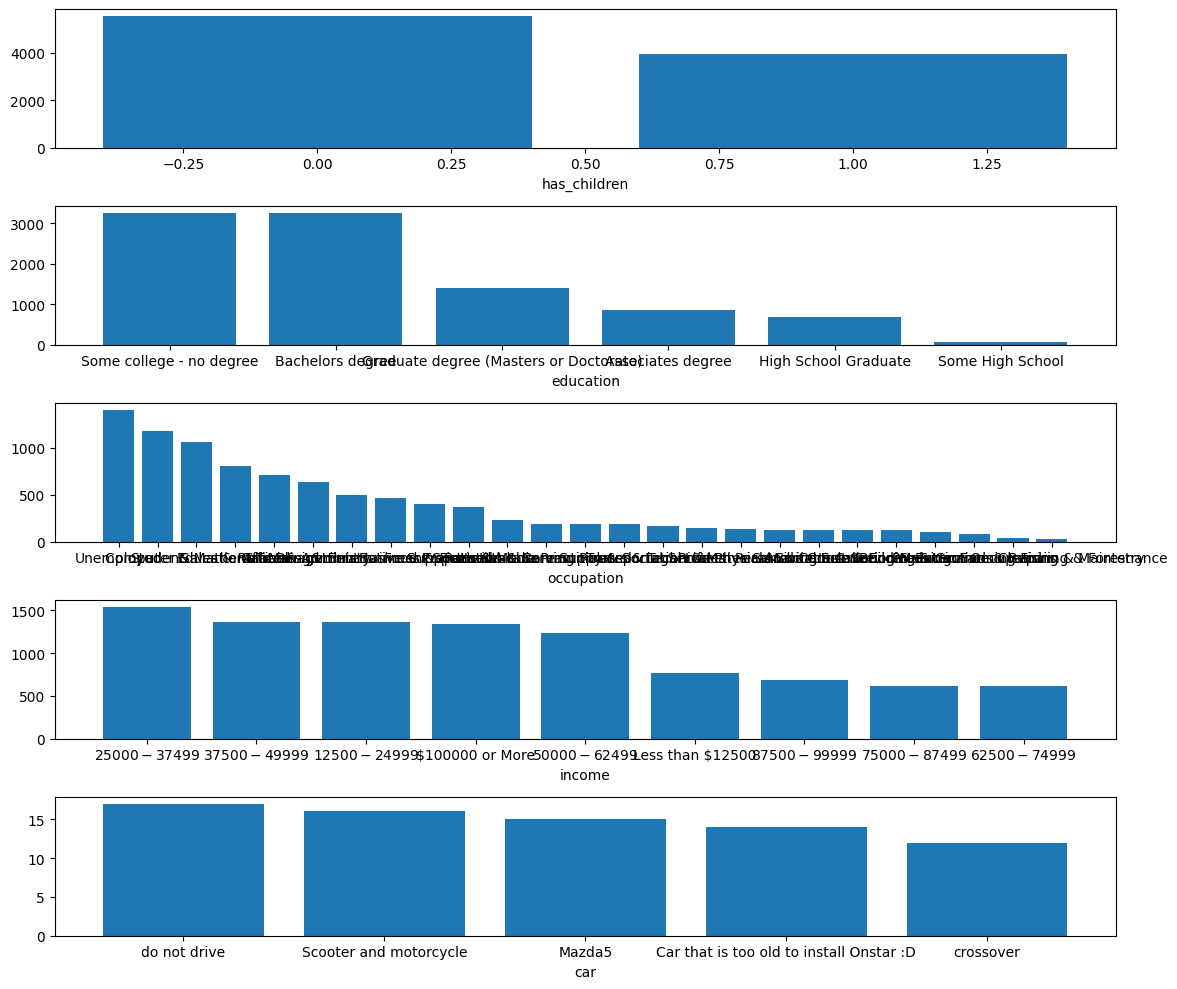

In [28]:
countplot_xy(X_train, cols[10:15], m=5, L=12, R=10)

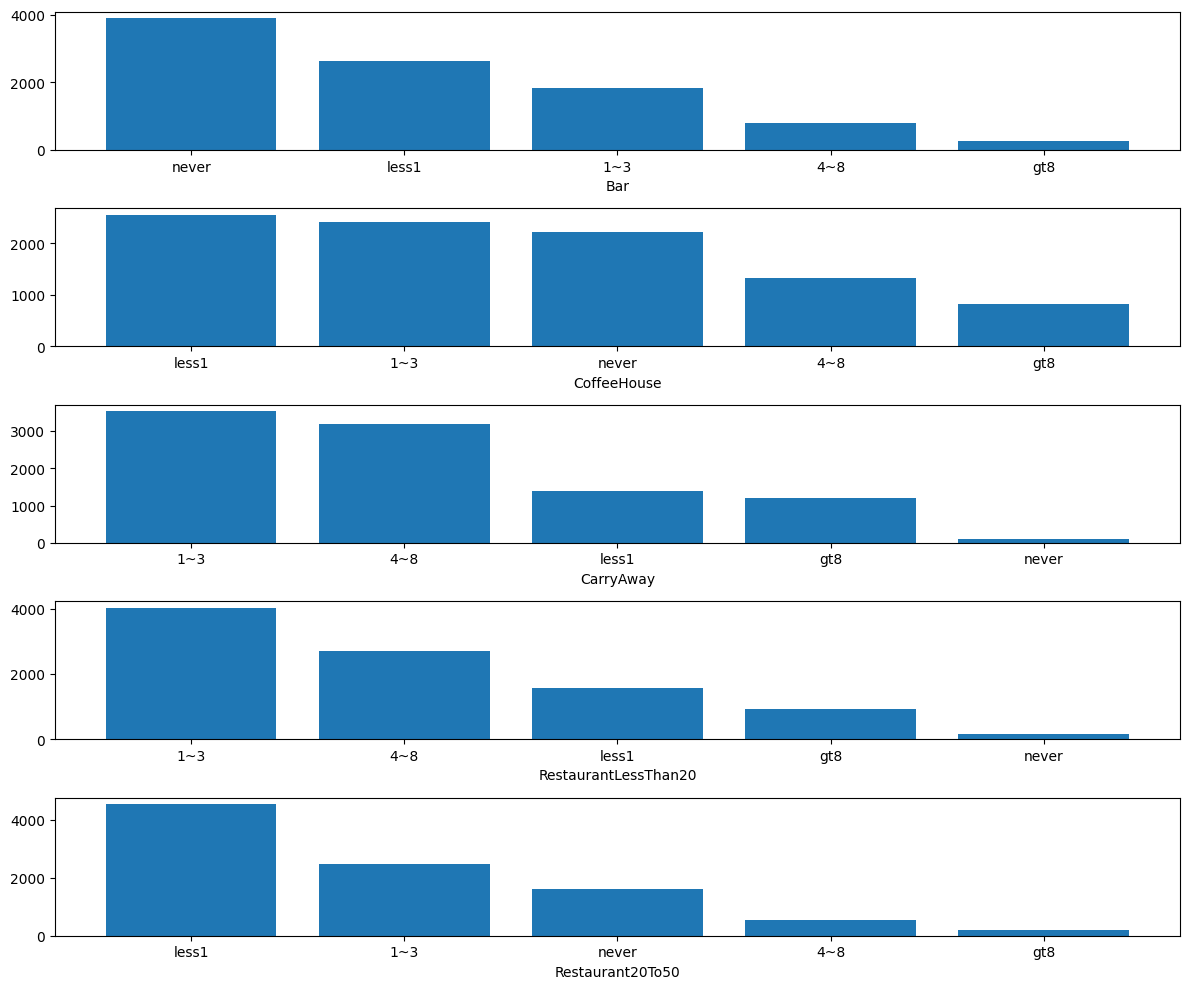

In [29]:
countplot_xy(X_train, cols[15:20], m=5, L=12, R=10)

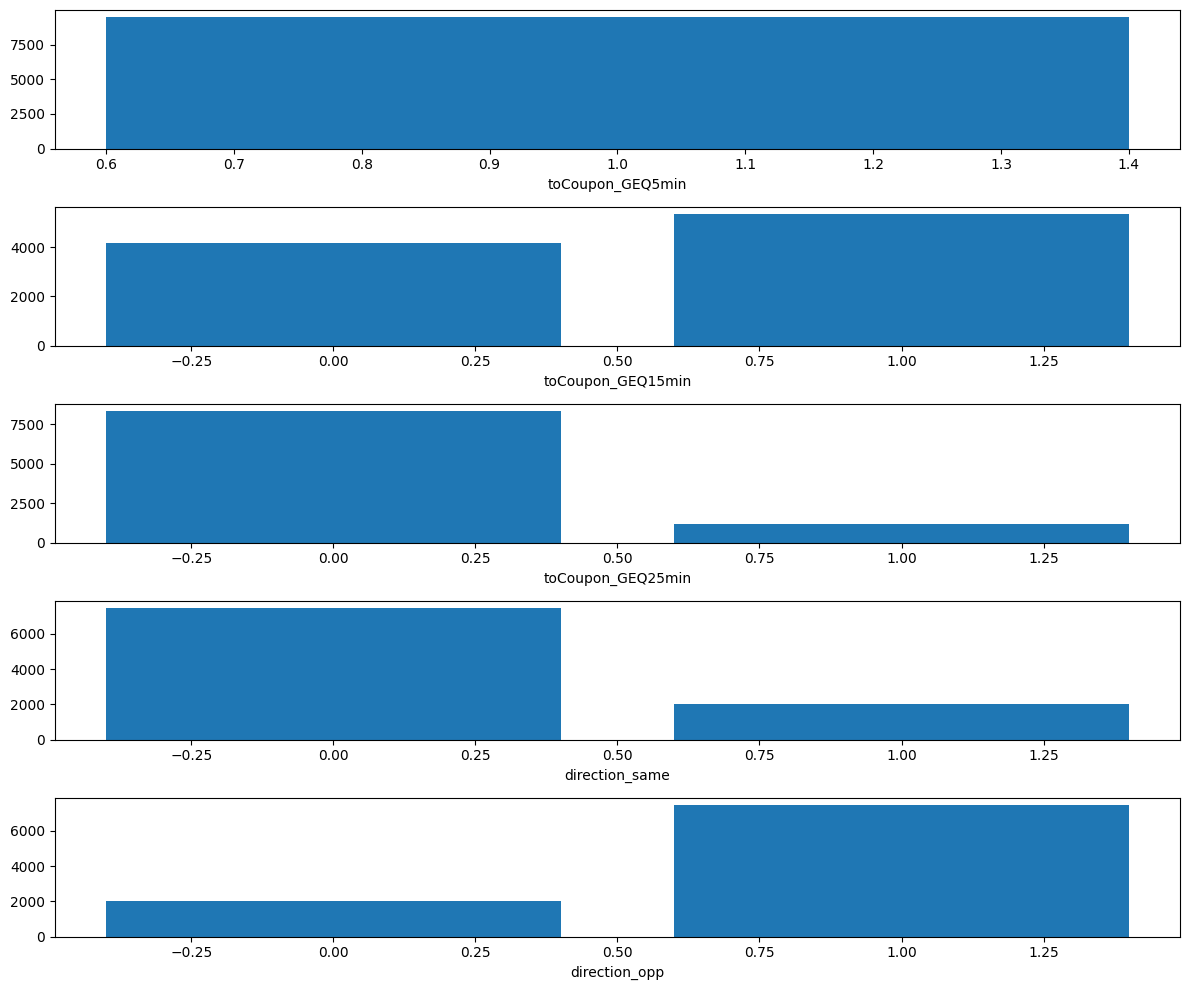

In [30]:
countplot_xy(X_train, cols[20:25], m=5, L=12, R=10)

**Calculating the number of null values in each column of our dataframe:**

In [31]:
null_counts = df.isnull().sum()
print("Cantidad de valores nulos por columna:")
print(null_counts)

Cantidad de valores nulos por columna:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


**Here, we perform three main tasks:**


**1.   Create a function designed for Data Cleaning;**

**2.   Create a function that calculates the Mutual Information between each feature and the target variable;**

**3.   Visualize the last function applied with the cleaned datasets.**


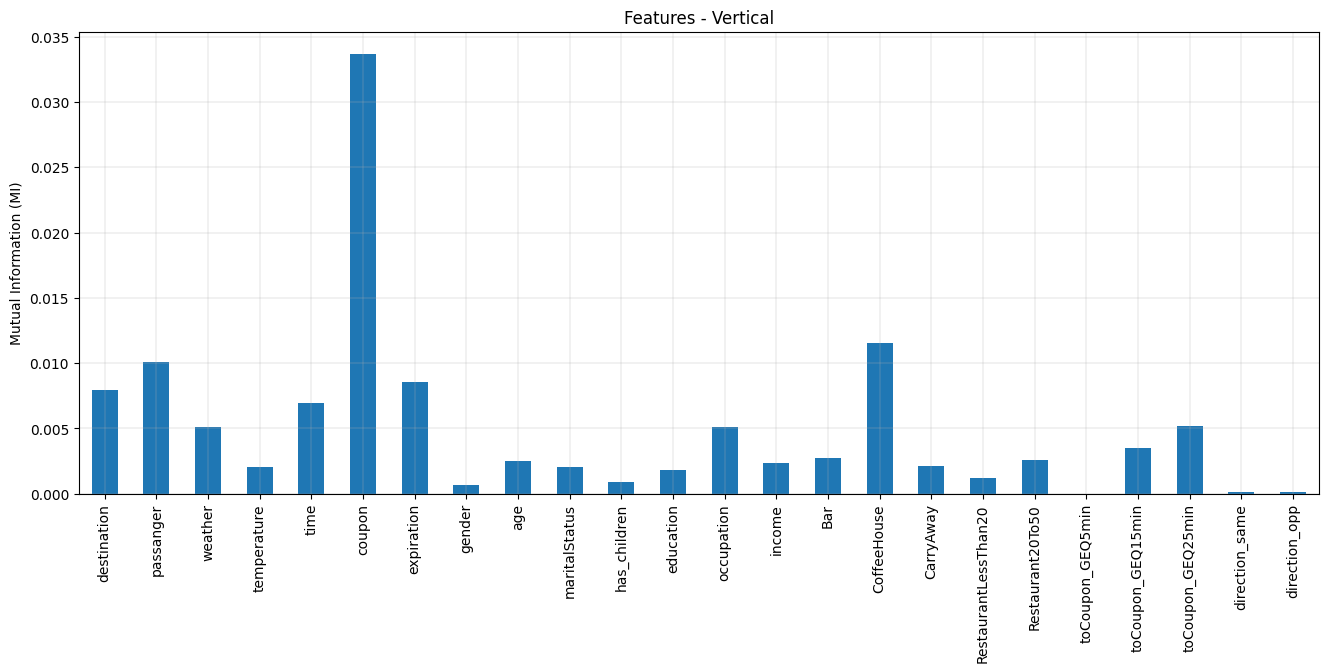

In [32]:
from sklearn.feature_selection import mutual_info_classif


def clean(df, r = 1):
  R = df.drop(['car'], axis=1).copy()
  to_fill = ['Bar', 'CoffeeHouse']
  R['CarryAway'] = R['CarryAway'].fillna('1-3' if r == 1 else "no-value")
  R['RestaurantLessThan20'] = R['RestaurantLessThan20'].fillna('1-3' if r == 1 else "no-value")
  R['Restaurant20To50'] = R['Restaurant20To50'].fillna('never' if r == 1 else "no-value")
  for name in to_fill:
    R[name] = R[name].fillna('less1' if r == 1 else "no-value")
  return R

def check_mutual_information2(df, target, cols_with_text):
    df_ = df.copy()
    enc = OrdinalEncoder()

    for name in cols_with_text:
          df_[name] = enc.fit_transform(df_[name].values.reshape(-1, 1))

    X = df_.drop(target, axis=1)
    y = df_[target]


    ## Visualize the mutual information of each variable (Just run!)
    ## mt_info is the output of Sklearn function
    mt_info = mutual_info_classif(X, y, discrete_features=True)
    mt_info_df = pd.Series(mt_info)
    mt_info_df.index = X.columns
    mt_info_df.plot.bar(figsize = (16,6));
    plt.ylabel('Mutual Information (MI)')
    plt.title('Features - Vertical')
    plt.grid(linewidth=0.25)
    plt.show()

train2 = clean(X_train)
test2 = clean(X_test)

disc = ['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
check_mutual_information2(pd.concat([train2, y_train], axis=1), 'Y', disc)


**Adapting the categorical feature in the dataframe 'Xy' using One-Hot Encoding. These features are:**


*   "passanger";
*   "coupon";
*   "CoffeeHouse";
*   "destination";
*   "expiration";
*   "weather";
*   "occupation".



In [33]:
def adapt_categorical3(X, selected):
  return pd.get_dummies(X[selected], columns=selected)

selected = ['passanger', 'coupon', 'CoffeeHouse', 'destination', 'expiration', 'weather', 'occupation']
train3 = adapt_categorical3(train2, selected)
test3 = adapt_categorical3(test2, selected)
train3.head()

,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),CoffeeHouse_1~3,...,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
3288,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2015,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7839,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1885,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6478,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


#### Discussion of key points

- Were there missing values in the dataset? How did you dealt with each one?

**In our analysis, we did encounter some missing values in the dataset. However, these instances were relatively infrequent compared to the overall dataset. To address this, we opted to replace the missing values with representative values. In the majority of cases, we chose to impute the missing values with the mode of the respective feature. This decision was made because there was no clear indication or discernible pattern suggesting that the missing values should be replaced with values other than the mode. In other words, the most common value was considered a reasonable approximation for the missing values, as there was no inherent bias towards higher or lower values based on the available data.**

**It's worth noting that the choice of imputation method was influenced by the nature of the data. For instance, when considering categorical variables like the ones in question, we concluded that the absence of a specific response did not necessarily imply a lower frequency of occurrence. Thus, imputing missing values with the mode ensured that we maintained a balanced representation of the data without introducing any unwarranted assumptions regarding the distribution of responses.**

**Additionally, in cases where respondents were given the option to select 'never,' we decided to replace missing values with categories indicating low frequency, such as 'less1' or '1~3,' depending on the context. This approach was chosen to preserve the integrity of the data and avoid any distortion in the analysis due to the presence of missing values.**

**Overall, our strategy for dealing with missing values aimed to maintain the integrity and representativeness of the dataset while ensuring that our analyses and interpretations accurately reflected the underlying data patterns.**

- Changing the missing values impacted in the mutual information of features with the target?

**While changing the missing values may have introduced minor adjustments to the dataset, our analysis indicates that these alterations did not have a substantial impact on the 'MI' values. The subsequent analysis and visualizations illustrate that the relationships between the features and the target remained largely consistent before and after the imputation of missing values.**

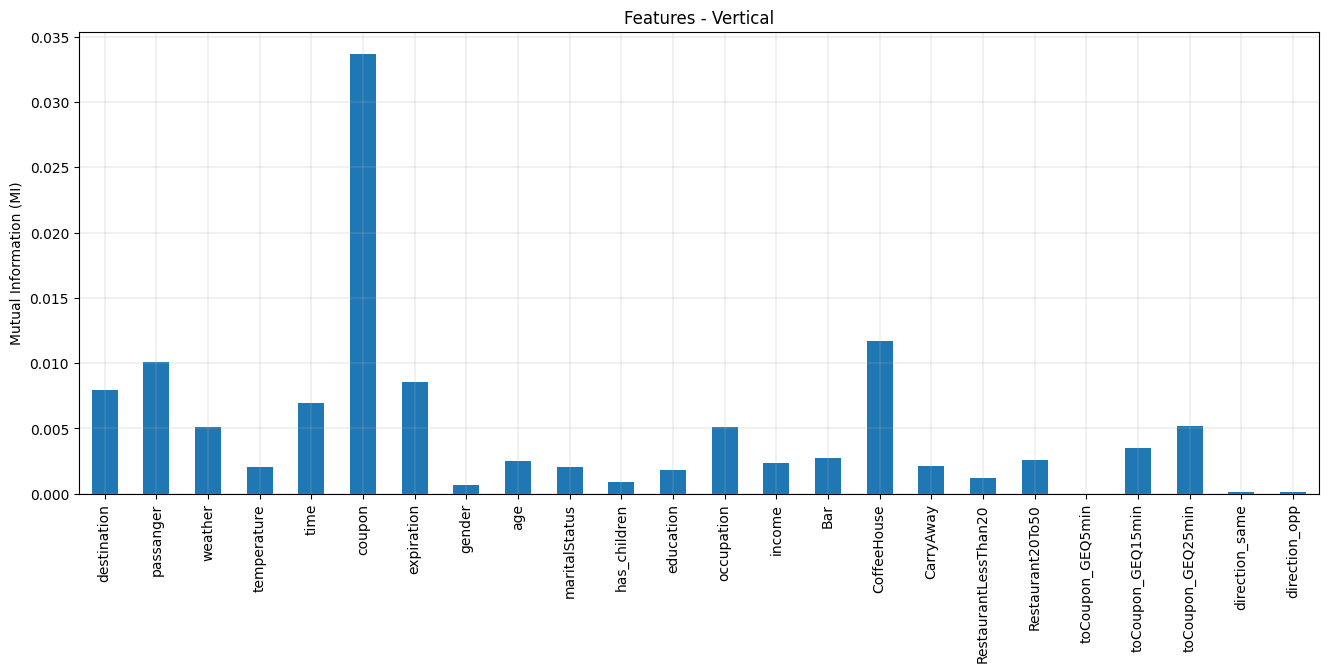

In [34]:
train4 = clean(X_train, 0)
test4 = clean(X_test, 0)

disc = ['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
check_mutual_information2(pd.concat([train4, y_train], axis=1), 'Y', disc)

### **Train a K-Nearest Neighbors Classifier** (2.5 points)


You should use the Sklearn `KNeighborsClassifier` function to fit the data.

You can use different metrics such as accuracy and f1-score from Sklearn (or create your own implementation) to understand the model's performance.

Also, plot a confusion matrix to analyze the results.
A Confusion matrix is a matrix were the columns represent the true label, and rows represent the predicted label. As this is a binary classification task, the matrix should have 2x2. You can study more about it [here](https://en.wikipedia.org/wiki/Confusion_matrix). You can use sklearn functions that help in building and displaying it.

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

**Below, we´re going to train a *KNN classifier* using differents values of K, in an interval that goes from 1 to 99, and evaluate its performance through the *f1-score* metric. Then, we choose the optimal K by looking for the one with the greater *f1-score*.**

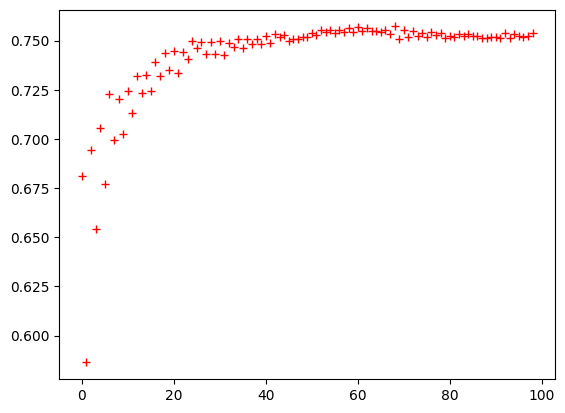

In [36]:
accs = []
idx = -1
val = -1
for i in range(1, 100):
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(train3, y_train)
  accuracy = f1_score(y_test, clf.predict(test3))
  if val < accuracy:
    val = accuracy
    idx = i
  accs.append(accuracy)

plt.plot(range(len(accs)), accs, 'r+')

**From the graph obtained, we get that the "Best K" is:**

In [37]:
print('best k:', idx)

best k: 69


**Visualizing the performance of our model through a *Confusion Matrix*:**

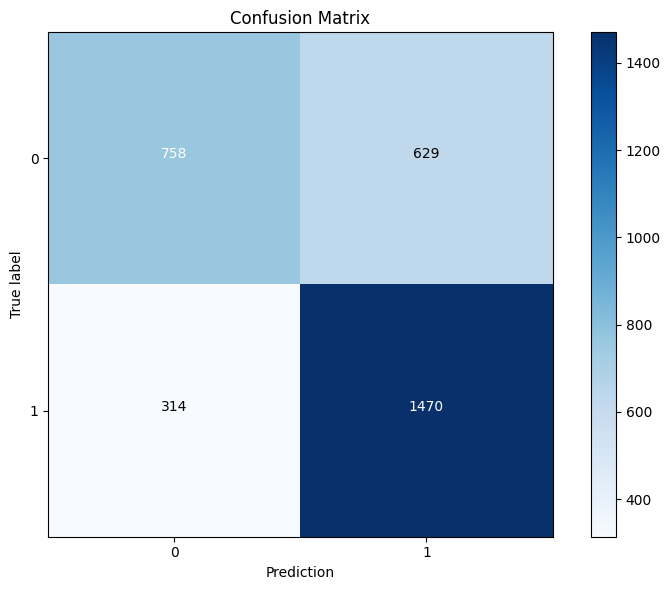

In [38]:
from sklearn.metrics import confusion_matrix

clf = KNeighborsClassifier(n_neighbors=idx)
clf.fit(train3, y_train)

conf_matrix = confusion_matrix(y_test, clf.predict(test3))
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()

classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('Confusion Matrix')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

#### Discussion of key points

- Is accuracy a good metric for this problem? Justify.

**Given the imbalance in our dataset's output values, accuracy might not be the most appropriate metric for our evaluation. This is because accuracy does not consider the class distribution and may be misleading, especially when one class dominates the dataset and, because of that, it could yield a misleading result: especially in our case, which has an imbalance between the output values and could end up predominantly predicting one class, providing an unreliable high accuracy.**

**The F1-score, on the other hand, is a metric that considers both precision and recall, making it more robust in scenarios with class imbalance. It provides a balance between the two and is particularly useful when the cost of false positives and false negatives differs significantly.**

- What conclusions can you have when looking your results in the confusion matrix?

**It is noticeable that  70% of our model's predictions align with the actual values. This performance indicates that the model is effectively balancing between the precision of its predictions and their recall and this is crucial for our case, in which the false positives have the same importance as the false negatives.**

**The F1 score, which harmonizes the precision and recall, strengthens our line of thought, as it quantifies the model's accuracy in terms of its balanced performance.**

- What was the best K for this problem? How the selection o K impacts the Bias-variance tradeoff?

**The best K values obtained were between 30 and 70, and, ultimately, the value of 69 was chosen. This specific selection of K for this choice of columns demonstrates stability and reduces overfitting as K increases. It presented to be the most suitable choice of K once it contributed to a decrease in variance without significantly increasing bias, giving us a model with better generalization.**

**In our case, a stable performance with a relatively high K suggests that our model benefits from considering a broader set of neighbors to reduce the impact of noise on our classification.**

**Interestingly, when selecting another subset of columns, a subset smaller than the ones used previously, there was a fluctuation in values between 20 and 50. Since there were fewer combinations, a lower K might  presented to be more suitable, exactly because of these fewer dimensions influencing the decision. However, this may also lead to more sensitivity to noise in the data, causing a certain overfitting.**

**We can conclude that the selection of K is closely related to the bias-variance tradeoff, once a too complex model with a too low K causes high variance and a too simple model with a too high K leads to a high bias.**

## **Multiclass classification** (1 point)

In this last section you should adapt the "**Seoul Bike Sharing Demand**" dataset target, creating an arbitrary number N of classes, where 2 < N < 11.

Classes should represent equally spaced intervals in the continuous target of the original dataset(`Rented Bike count`).<br/>
For example, if N == 3, we should have 3 classes. Given that $\hat{x}$ is the maximum value of the known `Rented Bike count` in train dataset, samples with y <= $\hat{x}/3$ should be of class 0, samples y > $\hat{x}/3$ but y <= $2*\hat{x}/3$ should be of class 1, and samples where y > $2*\hat{x}/3$ should be of class 2.

You can use the Sklearn KNN classifier for this task, as well as any sklearn helper functions. Remember to carefully perform the needed preprocess steps discussed in other sections (if necessary).

Plot a confusion matrix with the results.

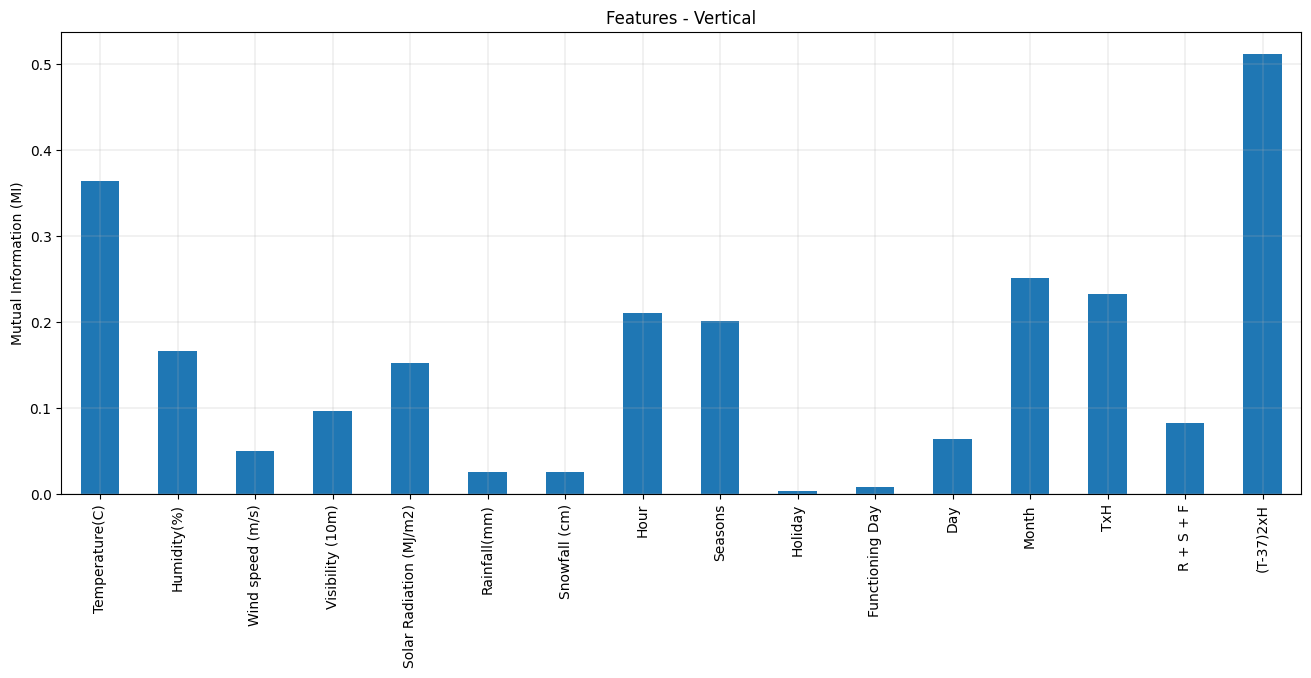

In [39]:
def check_mutual_information3(df):
    df_ = df.copy()
    enc = OrdinalEncoder()

    df_['Seasons'] = enc.fit_transform(df_['Seasons'].values.reshape(-1, 1))
    df_['Holiday'] = enc.fit_transform(df_['Holiday'].values.reshape(-1, 1))

    X = df_.drop('Rented Bike Count', axis=1)
    y = df_['Rented Bike Count']

    X['TxH'] = X['Temperature(C)'] * X['Humidity(%)']
    X['R + S + F'] = X['Functioning Day'] + X['Rainfall(mm)'] + X['Snowfall (cm)']
    #X['T * S'] = X['Temperature(C)'] * X['Solar Radiation (MJ/m2)']
    X['(T-37)2xH'] = (X['Temperature(C)']-37)**2 * X['Humidity(%)']
    #X['(T-37)2xV'] = (X['Temperature(C)']-37)**2 * X['Visibility (10m)']
    discrete = ['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Day', 'Month']
    is_bool = []
    for name in X.columns:
      is_bool.append(name in discrete)

    ## Visualize the mutual information of each variable (Just run!)
    ## mt_info is the output of Sklearn function
    mt_info = mutual_info_classif(X, y, discrete_features=is_bool)
    mt_info_df = pd.Series(mt_info)
    mt_info_df.index = X.columns
    mt_info_df.plot.bar(figsize = (16,6));
    plt.ylabel('Mutual Information (MI)')
    plt.title('Features - Vertical')
    plt.grid(linewidth=0.25)
    plt.show()

N = 16
Train = train_xy.copy()
Test = test_xy.copy()
max_train = Train[target].max()

rangos = [i * (max_train / N) for i in range(N+1)]
labels = list(range(N))
Train[target] = pd.cut(Train[target], bins=rangos, labels=labels)
Test[target] = pd.cut(Test[target], bins=rangos, labels=labels)
Test[target] = Test[target].fillna(N-1);

check_mutual_information3(Train)

In [40]:
def adapt_categorical3(Xy):
  xy = Xy.copy()
  xy = pd.get_dummies(xy, columns=['Seasons'])

  xy['TxH'] = xy['Temperature(C)'] * xy['Humidity(%)']
  #xy['R + S + F'] = xy['Functioning Day'] + xy['Rainfall(mm)'] + xy['Snowfall (cm)']
  xy['(T-37)2xH'] = (xy['Temperature(C)']-37)**2 * xy['Humidity(%)']
  #xy['T * S'] = xy['Temperature(C)'] * xy['Solar Radiation (MJ/m2)']
  # eliminar variables no influenciantes segun el mutual info
  return xy.drop(['Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Snowfall (cm)', 'Rainfall(mm)', 'Holiday', 'Day', 'Functioning Day'], axis=1)

Tr3 = adapt_categorical3(Train)
Te3 = adapt_categorical3(Test)
Tr3.head()

,Temperature(C),Humidity(%),Hour,Rented Bike Count,Month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,TxH,(T-37)2xH
2223,16.0,14,15,7,3,False,True,False,False,224.0,6174.00
798,-6.7,48,6,0,1,False,False,False,True,-321.6,91665.12
7752,11.3,71,0,1,10,True,False,False,False,802.3,46894.79
734,3.0,28,14,0,12,False,False,False,True,84.0,32368.00
2881,11.5,77,1,0,3,False,True,False,False,885.5,50069.25


<BarContainer object of 16 artists>

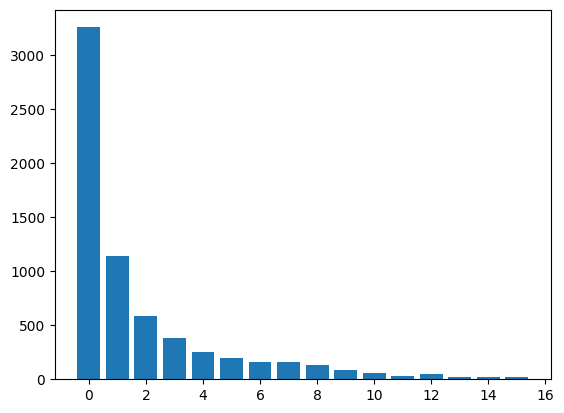

In [41]:
frecuencia = Tr3[target].value_counts()
plt.bar(frecuencia.index, frecuencia.values)

best k: 23


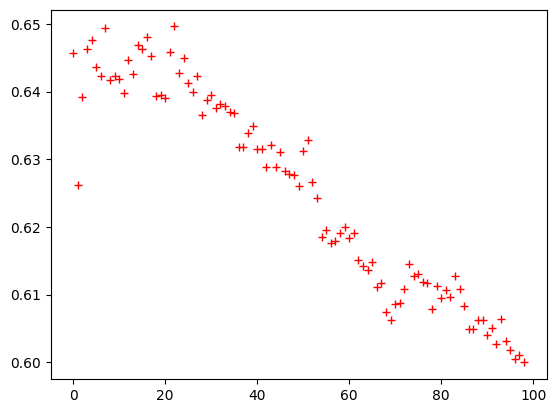

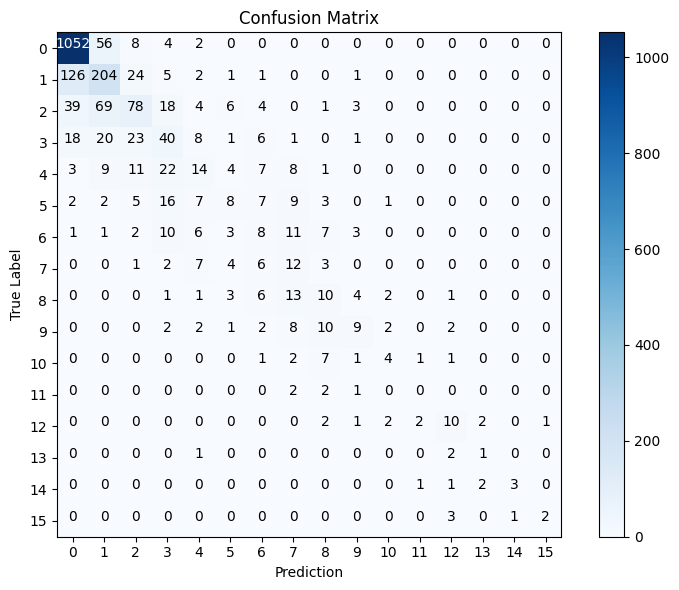

In [42]:
def evaluate3(X_train, y_train, X_test, y_test):
  X_train = X_train.astype(float)
  X_test = X_test.astype(float)
  train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
  test = (X_test - X_train.min()) / (X_train.max() - X_train.min())

  accs = []
  idx = -1
  val = -1
  for i in range(1, 100):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train, y_train)
    f1 = f1_score(y_test, clf.predict(test), average='weighted')

    if val < f1:
      val = f1
      idx = i
    accs.append(f1)

  plt.plot(range(len(accs)), accs, 'r+')
  print("best k:", idx)


  clf = KNeighborsClassifier(n_neighbors=23)
  clf.fit(train, y_train)

  conf_matrix = confusion_matrix(y_test, clf.predict(test))
  plt.figure(figsize=(8, 6))
  plt.imshow(conf_matrix, cmap=plt.cm.Blues)
  plt.colorbar()

  classes = np.unique(y_test)
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  plt.xlabel('Prediction')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')

  for i in range(len(classes)):
      for j in range(len(classes)):
          plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

  plt.tight_layout()
  plt.show()



Xtr3 = Tr3.drop(target, axis=1).copy()
Xte3 = Te3.drop(target, axis=1).copy()
ytr3 = Tr3[target]
yte3 = Te3[target]

evaluate3(Xtr3, ytr3, Xte3, yte3)

#### Discussion of key points

- Is accuracy a good metric for this problem? Justify.

**Similarly to the previous case, the classes are imbalanced and the accuracy wouldn't be a recommended metric, since it could simply predict all zeros and this would suffice to achieve a high score.**

**In cases like ours where one class vastly outnumbers the others, a classifier could achieve a high accuracy simply by predicting the majority class for all instances. And, especially in our case, in which certain conditions may lead to much higher or lower demand, it's crucial to correctly predict the instances across all classes, not just the majority class.**

- What conclusions can you have when looking your results in the confusion matrix?

**It is not hard to see that the *Confusion Matrix* is very close to a diagonal matrix, which indicates that it's predicting a homogeneous percentage for each class. Consequently, this implies that the model comprehends the variations in highs and lows within the dataset effectively.**

- There is value in solve a regression problem as a multiclass classification problem?


**I understand that there are situations where the specific value doesn't matter, but rather specific thresholds. In those cases, a regression problem could be treated directly as a classification problem which allows for the direct classification of instances into predefined intervals or categories based on these thresholds.**

**Also, in situations where we have to be careful with class imbalance and think about achieving a balanced prediction across all classes is desirable, treating the regression problem as a multiclass classification problem can be advantageous.**

**Although, it is important to notice that, as in the current scenario, you could search for a metric that penalizes imbalances and achieves a similar percentage in each class without the issue of predicting an average value (such as always predicting within the interval where most of the values occur). This way, we can have multiple areas of interest.**